In [1]:
!pwd # 현재 작업중인 경로 확인

/content


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
# 필요한 라이브러리는 이렇게 위에 모아서 적는게 좋아..
import pandas as pd
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 지원
import matplotlib as mlp # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 지원
import matplotlib.pyplot as plt # matplotlib 안의(.) pyplot 을 import
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

In [4]:
#data = pd.read_csv('./sample_data/data.csv', encoding='cp949') # 상대 경로
data = pd.read_csv('/content/sample_data/data.csv', encoding='cp949') # 절대 경로
data

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,성북구,1,0,1,0,0,1
1,서울,강서구,1,0,2,1,1,0
2,서울,강남구,1,0,1,1,0,0
3,서울,강동구,37,1,85,10,60,15
4,서울,송파구,24,1,49,5,38,6
...,...,...,...,...,...,...,...,...
153,대전,서구,5,1,14,3,11,0
154,대전,유성구,26,2,52,20,32,0
155,대전,대덕구,21,2,34,9,24,1
156,울산,울주군,47,5,79,18,57,4


In [5]:
# data의 columns 확인
data.columns

Index(['시도', '시군구', '발생건수', '사망자수', '부상자수', '중상', '경상', '부상신고'], dtype='object')

In [6]:
# 컬럼들의 리스트
c_list = list(data.columns)
print(c_list[0])

시도


In [7]:
data.head() # default 5줄

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,성북구,1,0,1,0,0,1
1,서울,강서구,1,0,2,1,1,0
2,서울,강남구,1,0,1,1,0,0
3,서울,강동구,37,1,85,10,60,15
4,서울,송파구,24,1,49,5,38,6


In [8]:
data.head(3) # 3줄만 보기

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,성북구,1,0,1,0,0,1
1,서울,강서구,1,0,2,1,1,0
2,서울,강남구,1,0,1,1,0,0


In [9]:
# 최대 표시할 줄 수 설정
pd.set_option('display.max_rows', 10)
# 최대 열 수 설정
pd.set_option('display.max_columns', 10)
# 표시할 가로의 길이
pd.set_option('display.width', 10)

In [10]:
# 각 컬럼의 값들을 중복없이 확인
data['시군구'].value_counts() # '시군구' 컬럼의 모든 값이 각각 몇번 나왔는지 확인

동구     3
서구     3
북구     3
강서구    2
중구     2
      ..
인제군    1
양양군    1
청주시    1
충주시    1
세종     1
Name: 시군구, Length: 150, dtype: int64

In [11]:
# 양천구의 데이터만 조회
data[data['시군구']=='양천구']

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
6,서울,양천구,3,0,4,1,3,0


In [12]:
# '발생건수'를 기준으로 내림차순 정렬
data_dc = data.sort_values(by=['발생건수'], ascending=False)
data_dc

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
35,경기,용인시,317,7,760,138,494,128
17,경기,성남시,197,7,342,77,232,33
27,경기,화성시,152,4,368,68,236,64
28,경기,시흥시,118,4,199,29,159,11
22,경기,평택시,110,5,270,44,146,80
...,...,...,...,...,...,...,...,...
129,경남,사천시,1,0,1,0,1,0
96,전남,구례군,1,1,1,0,1,0
99,전남,강진군,1,0,2,0,2,0
102,전남,영광군,1,0,4,0,4,0


In [13]:
# '발생건수'를 기준으로 오름차순 정렬
data_ac = data.sort_values(by=['발생건수'], ascending=True)
data_ac

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,성북구,1,0,1,0,0,1
63,충북,증평군,1,0,2,0,2,0
76,충남,계룡시,1,0,3,0,3,0
90,전남,목포시,1,0,1,0,1,0
95,전남,곡성군,1,0,5,0,5,0
...,...,...,...,...,...,...,...,...
22,경기,평택시,110,5,270,44,146,80
28,경기,시흥시,118,4,199,29,159,11
27,경기,화성시,152,4,368,68,236,64
17,경기,성남시,197,7,342,77,232,33


In [14]:
# data_dc: '발생건수'를 기준으로 내림차순 정렬한 것
data_dc_top10 = data_dc[0:10] # 슬라이싱: data_dc의 0행부터 9행까지 총 10줄을 추출
# data_dc[0:10] == data_dc[:10] 둘이 똑같음
data_dc_top10

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
35,경기,용인시,317,7,760,138,494,128
17,경기,성남시,197,7,342,77,232,33
27,경기,화성시,152,4,368,68,236,64
28,경기,시흥시,118,4,199,29,159,11
22,경기,평택시,110,5,270,44,146,80
123,경남,김해시,105,6,197,68,123,6
64,충남,천안시,102,2,315,67,242,6
36,경기,안성시,95,2,234,45,166,23
42,경기,하남시,93,1,180,39,124,17
21,경기,안산시,88,5,157,36,107,14


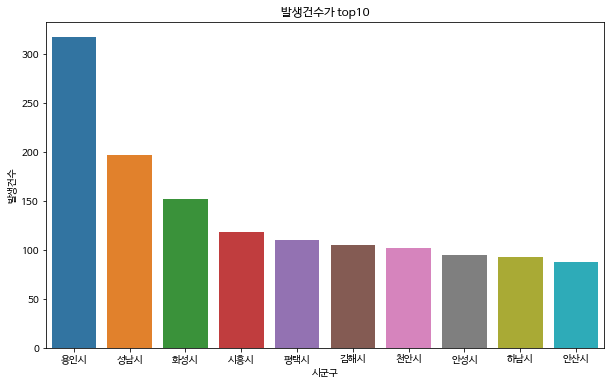

In [15]:
# 발생건수가 높은 top10을 그래프로 그리기
plt.figure(figsize=(10, 6)) # 그래프의 크기를 가로10, 세로6으로 지정
plt.title('발생건수가 top10')# 그래프의 제목 지정
# x축을 '시군구'로, y축을 '발생건수'로 data_dc_top10을 그래프로 시각화
sns.barplot(x='시군구', y='발생건수', data=data_dc_top10)

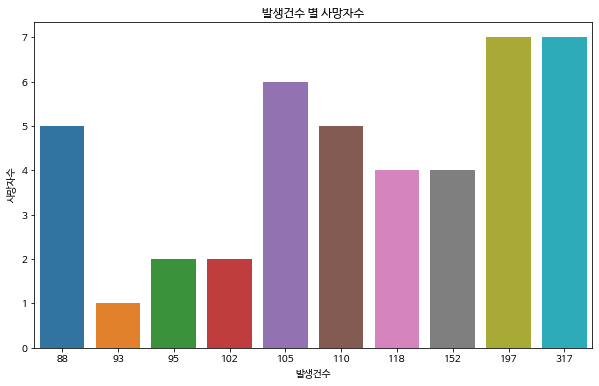

In [16]:
plt.figure(figsize=(10, 6)) # 그래프의 크기를 가로10, 세로6으로 지정
plt.title('발생건수 별 사망자수')# 그래프의 제목 지정
# x축을 '시군구'로, y축을 '발생건수'로 data_dc_top10을 그래프로 시각화
sns.barplot(x='발생건수', y='사망자수', data=data_dc_top10)

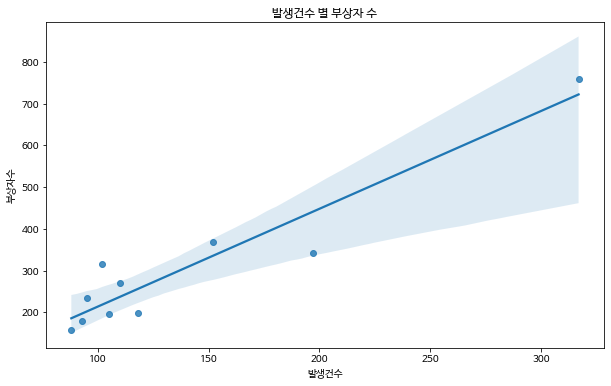

In [17]:
plt.figure(figsize=(10, 6)) # 그래프의 크기를 가로10, 세로6으로 지정
plt.title('발생건수 별 부상자 수')# 그래프의 제목 지정
# data_dc_top10['발생건수']를 x축으로, data_dc_top10['부상자수']를 y축으로 시각화
sns.regplot(x=data_dc_top10['발생건수'].astype(float), # .astype(float)은 float로 형변환
            y=data_dc_top10['부상자수'].astype(float))

In [ ]:
sns.barplot(x='시군구', y='발생건수', data=data_dc_top10)

In [21]:
data_dc_top10['시군구'].value_counts()

용인시    1
성남시    1
화성시    1
시흥시    1
평택시    1
김해시    1
천안시    1
안성시    1
하남시    1
안산시    1
Name: 시군구, dtype: int64

In [22]:
data_dc_top10['시군구'].value_counts().index

Index(['용인시',
       '성남시',
       '화성시',
       '시흥시',
       '평택시',
       '김해시',
       '천안시',
       '안성시',
       '하남시',
       '안산시'],
      dtype='object')

In [24]:
data_dc_top10['시군구'].value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
labels = list(data_dc_top10['시군구'].value_counts().index)
labels

['용인시', '성남시', '화성시', '시흥시', '평택시', '김해시', '천안시', '안성시', '하남시', '안산시']

In [28]:
data_dc_top10['사망자수'].values

array([7, 7, 4, 4, 5, 6, 2, 2, 1, 5])

In [30]:
ratio = list(data_dc_top10['사망자수'].values)
ratio

[7, 7, 4, 4, 5, 6, 2, 2, 1, 5]

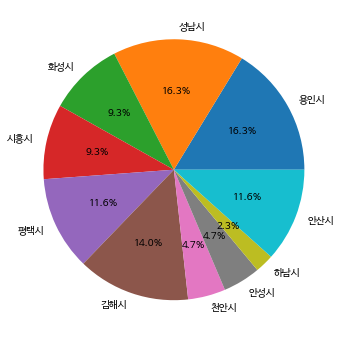

In [32]:
# 위에서 만든 labels, ratio로 파이차트 그리기
# https://wikidocs.net/92114
''' ratio를 어떻게 표시할건지 정의
autopct : None (default), str, or function, optional
    If not *None*, is a string or function used to label the wedges
with their numeric value.  The label will be placed inside the
wedge.  If it is a format string, the label will be fmt%pct.
If it is a function, it will be called.
'''
# autopct='%.1f%%' -> 소수점 첫번째자리의 퍼센트로 표시
plt.figure(figsize=(10, 6)) # 그래프의 크기를 가로10, 세로6으로 지정
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()